
# **Assignment 1**


## Task 1. Correlation
We will use the data example from the textbook "Statistical Analysis with The General Linear Model" by Miller and Haden (2013), Chapter 11.

As in Miller and Haden, we have five columns:

-Participant (Participant),

-Reading Ability (Abil),

-Intelligence (IQ),

-Number of minutes spent reading at home per week (Home),

-Number of minutes spent watching TV per week (TV).


For the task we will focus on the relationship between Reading Ability and IQ, but for further practice you can look at other relationships on your own.

**Question 1**:

a. Check whether the data is interval, ratio, or ordinal.

b. Check whether there is a data point for each participant on both variables.

c. Check whether the data is normally distributed in both variables.

d. Create a scatter plot with Reading Ability being the x-axis and IQ, being the y-axis.

e. Draw a correlation line on the scatter plot.


**Instructions:**

1. Load the necessary libraries and explain why you need them ("#used for ...").

2. Read the MillerHadenData.csv file into a DataFrame and name it "df_mh".

In [90]:
import pandas as pd # used for data manipulation
import seaborn as sns # used for visualization
import matplotlib  # used for plotting
from matplotlib import pyplot as plt # used for creating plots
import pylab # used for additional plotting functions
import pingouin as pg # used for statistical analysis and hypothesis testing

df_mh = pd.read_csv('/Users/macbook/Downloads/A1_analysing_data/data for A1/MillerHadenData.csv')



In [91]:
# Q1a (code):
# Display first few rows of the dataframe
print(df_mh.head())

# Check data types and information
print(df_mh.info())





   Participant  Abil   IQ  Home   TV
0            1    61  107   144  487
1            2    56  109   123  608
2            3    45   81   108  640
3            4    66  100   155  493
4            5    49   92   103  636
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Participant  25 non-null     int64
 1   Abil         25 non-null     int64
 2   IQ           25 non-null     int64
 3   Home         25 non-null     int64
 4   TV           25 non-null     int64
dtypes: int64(5)
memory usage: 1.1 KB
None


In [92]:
# Q1b (code):
# Check for missing values
missing_values = df_mh.isnull().sum()
print("Missing Values:")
print(missing_values)

# Check whether there is a data point for each participant on both variables
unique_participants = df_mh['Participant'].nunique()
print("Number of unique participants:", unique_participants)



Missing Values:
Participant    0
Abil           0
IQ             0
Home           0
TV             0
dtype: int64
Number of unique participants: 25


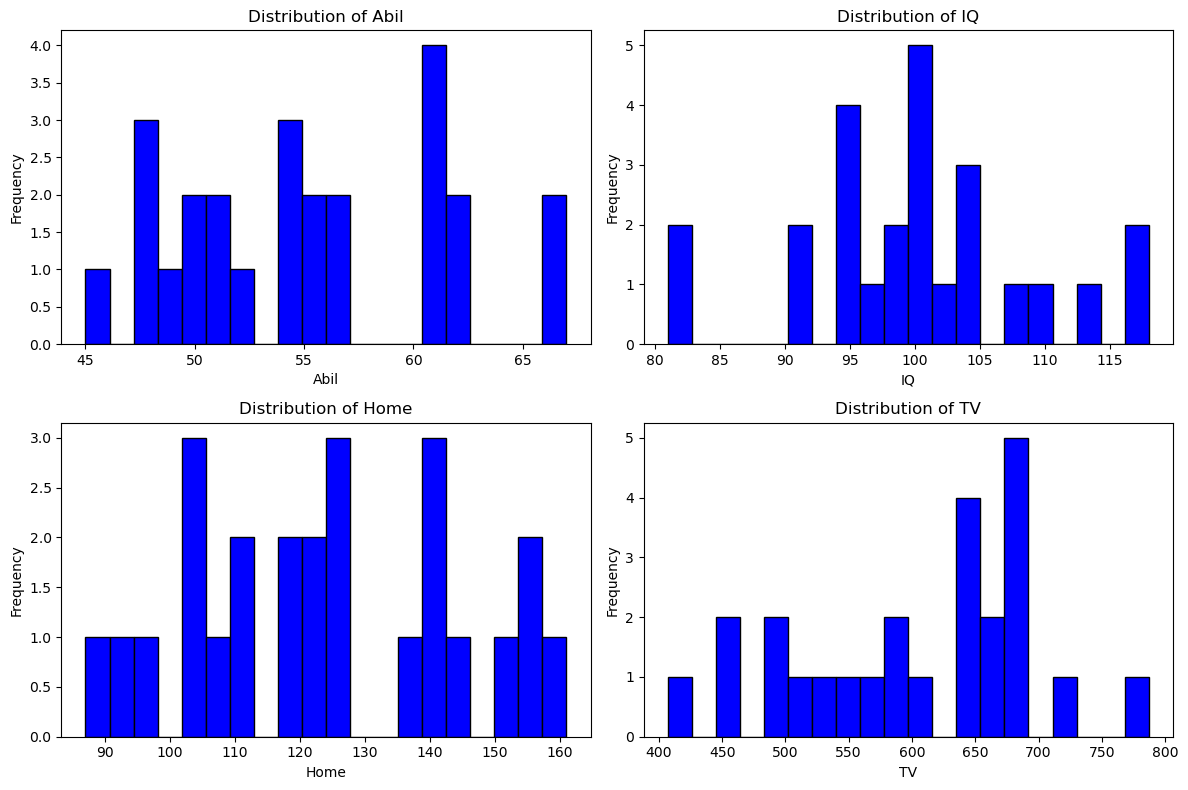

In [96]:
# Q1c (code):
# Check data distribution

# visual inspections of histograms to check whether the data is normally distributed
# Set the figure size for better visualization
plt.figure(figsize=(12, 8))

# Iterate columns in the DataFrame 
for i, column in enumerate(df_mh.columns[1:5]):  
    # Create subplots for each column
    plt.subplot(2, 2, i+1)
    
    # Plot histogram for the current column
    plt.hist(df_mh[column], bins=20, color='blue', edgecolor='black')
    
    # Set title and labels
    plt.title(f'Distribution of {column}')  # Set title with the column name
    plt.xlabel(column)  # Set x-axis label with the column name
    plt.ylabel('Frequency')  # Set y-axis label
    
# Adjust layout for better visualization
plt.tight_layout()

# Display the plot
plt.show()

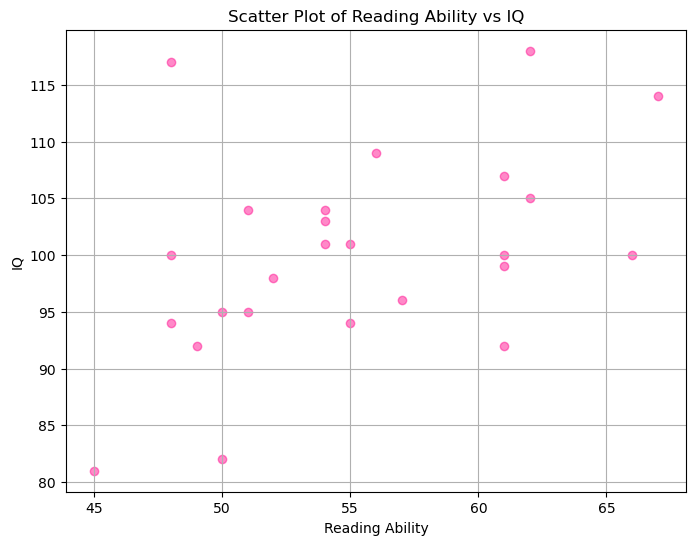

In [94]:
# Q1d (code):
# Scatter plot
plt.figure(figsize=(8, 6))  # Set the figure size
plt.scatter(df_mh['Abil'], df_mh['IQ'], color='deeppink', alpha=0.5)  # Create the scatter plot
plt.title('Scatter Plot of Reading Ability vs IQ')  # Set the title of the plot
plt.xlabel('Reading Ability')  # Set Reading Ability (Abil) as the x-axis
plt.ylabel('IQ')  # Set IQ as the y-axis
plt.grid(True)  # Add gridlines to the plot
plt.show()  # Display the plot




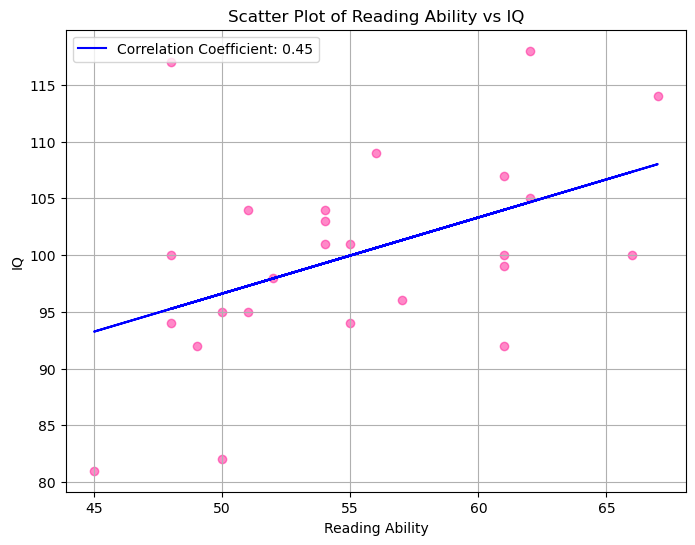

In [41]:
# Q1e (code):
# Correlation line

import numpy as np  # Import numpy for numerical computation

# Calculate the correlation coefficient between Reading Ability and IQ
correlation_coefficient = df_mh['Abil'].corr(df_mh['IQ'])

# Fit a linear regression line
x = df_mh['Abil']
y = df_mh['IQ']
m, b = np.polyfit(x, y, 1)  # the slope (m) and intercept (b) of the regression line

# Create a scatter plot with Reading Ability (Abil) as x-axis and IQ as y-axis
plt.figure(figsize=(8, 6))  # Set the figure size
plt.scatter(df_mh['Abil'], df_mh['IQ'], color='deeppink', alpha=0.5)  # Create the scatter plot

# Plot the correlation line and the label
plt.plot(x, m*x + b, color='b', label=f'Correlation Coefficient: {correlation_coefficient:.2f}')  # Plot the regression line

plt.title('Scatter Plot of Reading Ability vs IQ')  # Set the title of the plot
plt.xlabel('Reading Ability')  # Set Reading Ability as the x-axis
plt.ylabel('IQ')  # Set IQ as the y-axis
plt.legend()  # Add legend
plt.grid(True)  # Add gridlines
plt.show()  # Display the plot

**Question 2**:

a. Which correlation coefficient test can we use, Pearson or Spearman? Briefly explian why based on the results of Question 1.

b. Conduct a correlation coefficient test.

c. Interpret the result (direction and strength of the association between the two varibles)

# Q2a (answer with words):
Based on the results of Question 1, Pearson correlation coefficient is more suitable to be used here, as it measures the strength of the linear relationship between two continuous variables
The distribution of the data points around the fit line indicates a positive correlation between IQ and reading ability, which means an increase in IQ is generally associated with an increase in reading ability.
However, the distribution of the data points is not perfect, which means that while there is a relationship between the two, it is not solely determined by reading ability or vice versa.



In [43]:
# Q2b (code):

from scipy.stats import pearsonr # Import Pearsonr from scipy.stats for Pearson correlation coefficient

# the test of Pearson correlation coefficient

pearson_corr, pearson_p_value = pearsonr(df_mh['Abil'], df_mh['IQ']) # Calculate the Pearson correlation coefficient and p-value between 'Abil' (Reading Ability) and 'IQ' columns

# Print the results
print("Pearson correlation coefficient:", pearson_corr)
print("p-value:", pearson_p_value)


Pearson correlation coefficient: 0.45116993876507616
p-value: 0.02359260883361457


# Q2c (answer with words):
The Pearson correlation coefficient is approximately 0.45, and the p-value associated with it is 0.0236.

Direction of the association: Since the correlation coefficient is positive (0.45), it indicates a positive association between the two variables, which means that as one variable (Reading Ability) increases, the other variable (IQ) tends to increase as well.
Strength of the association: The correlation coefficient of 0.45 suggests a moderate positive relationship between Reading Ability and IQ. This means that there is a tendency for individuals with higher Reading Ability scores to have higher IQ scores, but the relationship is not extremely strong.
The p-value associated with the correlation coefficient is 0.02359260883361457, indicating that the correlation is statistically significant, which means it is unlikely to observe such a correlation coefficient by random chance.
In summary, the result suggests that there is a moderate positive association between Reading Ability and IQ scores in the dataset, and this association is statistically significant.

## Task 2. Chi-square Test
We will continue to use the data example from Task 1.

We want to explore whether there are significant differences in the amount of time spent reading at home per week (Home) among people with different reading abilities (Reading Ability). Therefore, we will divide the reading ability of all participants into two groups. The first group is those with low reading ability (Reading Ability at or below the rounded average), and the second group is those with high reading ability (Reading Ability above the rounded average). We will store this grouping in a new column named "Rank_Abil".


Similarly, the reading time is divided into two different scenarios: the first scenario is infrequent reading (Home at or below the rounded average), and the other is frequent reading (Reading Ability above the rounded average). We will store this grouping in a new column named "Rank_Home".


Then, construct a Contingency Matrix and perform a Chi-square test.

**Question 3**:

a. Please state the null hypothesis (H0) and alternative hypothesis (H1) for this Chi-square test.

b. Based on the task description, add new columns “Rank_Abil” and "Rank_Home" to the dataframe df_mh.

c. Construct a Contingency Matrix.

d. Perform a Chi-square test.

e. Interpret the results of the Chi-square test (answer in text).

# Q3a (answer in words):
# H0: 
The null hypothesis (H0) means that there is no significant association between Reading Ability and the amount of time spent reading at home per week.
# H1：
The alternative hypothesis (H1) means that there is a significant association between Reading Ability and the amount of time spent reading at home per week.

In [44]:
# Q3b (code):
# Import necessary libraries
import pandas as pd  # Used for data manipulation
from scipy.stats import chi2_contingency  # Used for chi-square test

# Define the rounded average for Reading Ability and Home
rounded_average_abil = round(df_mh['Abil'].mean())  # Rounded average for Reading Ability
rounded_average_home = round(df_mh['Home'].mean())  # Rounded average for Home

# Create the Rank_Abil column
df_mh['Rank_Abil'] = ['Low' if abil <= rounded_average_abil else 'High' for abil in df_mh['Abil']]

# Create the Rank_Home column
df_mh['Rank_Home'] = ['Infrequent' if home <= rounded_average_home else 'Frequent' for home in df_mh['Home']]

# Display the updated DataFrame
print(df_mh.head())



   Participant  Abil   IQ  Home   TV Rank_Abil   Rank_Home
0            1    61  107   144  487      High    Frequent
1            2    56  109   123  608      High  Infrequent
2            3    45   81   108  640       Low  Infrequent
3            4    66  100   155  493      High    Frequent
4            5    49   92   103  636       Low  Infrequent


In [45]:
# Q3c (code):
# Construct Contingency Matrix

# Group the data by Rank_Abil and Rank_Home and count the frequencies
contingency_matrix = pd.crosstab(df_mh['Rank_Abil'], df_mh['Rank_Home'])

# Display the Contingency Matrix
print("Contingency Matrix:")
print(contingency_matrix)


Contingency Matrix:
Rank_Home  Frequent  Infrequent
Rank_Abil                      
High              8           2
Low               3          12


In [47]:
# Q3d (code):
# Perform the Chi-square test

# Use chi2_contingency() function for the chi-square test on the contingency matrix
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_matrix)

# Display the results
print("Chi-square Statistic:", chi2_stat)
print("p-value:", p_val)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:")
print(expected)



Chi-square Statistic: 6.500270562770561
p-value: 0.010785807794066234
Degrees of Freedom: 1
Expected Frequencies:
[[4.4 5.6]
 [6.6 8.4]]


# Q3e (answer in words):
Result:
The chi-square test outcomes suggest a notable connection between Reading Ability and weekly reading time at home.

Interpretion: The chi-square test statistic, at 6.50, displays a noticeable deviation from the expected counts, suggesting a relationship between Reading Ability and weekly reading time at home. Given the p-value of 0.011, we reject the null hypothesis, indicating a significant association between Reading Ability and the amount of time spent reading at home weekly.



## Task 3. Two-sample t-test
As we discussed on Week 3, Two-sample designs are very useful when we want to know whether there is a difference between groups on a particular variable.

In this assignment, you will be guided to replicate the Experiment 4 (p. 887-888) from the paper below, focusing on understanding the data through descriptive statistics, visualizing distributions, testing assumptions (normality and variance homogeneity), and finally performing the independent t-test.

Schroeder, J. and Epley, N. (2015). The sound of intellect: Speech reveals a thoughtful mind, increasing a job candidate's appeal. Psychological Science, 26, 277--891.


As we explained during Week 3 lecture, there are different types of two-sample designs depending on whether or not the two groups are independent (e.g., different participants in different conditions) or not (e.g., same participants in different conditions). In this course we focus on independent samples, which typically means that the observations in the two groups are unrelated - usually meaning different people. But in real practice you will need to go through similar procedures to determine which is the proper statistical test to use.




### Background of data: Speech as indicator of intellect
To recap on Experiment 4, 39 professional recruiters from Fortune 500 companies evaluated job pitches of M.B.A. candidates (Masters in Business Administration) from the University of Chicago Booth School of Business. The methods and results appear on pages 887--889 of the article if you want to look at them specifically for more details.

###Step 1: Analyze the demographics of evaluators from the provided dataset

**Instructions:**

1. Load the necessary libraries (pandas, scipy, numpy, matplotlib.pyplot, seaborn) and explain why you need them ("#used for ...").

2. Read the evaluators.csv file into a DataFrame.

3. Calculate the mean and standard deviation of the age of the evaluators, handling missing values appropriately.

4. Count how many male and female evaluators were in the study.

**Question 4:**

a. What was the mean age of the evaluators?
What was the standard deviation of the age of the evaluators?

b. How many participants were female and how many participants were male?


In [89]:

import pandas as pd # used for data manipulation
from scipy import stats # used for statistical analysis
import numpy as np # used for numerical computing
import matplotlib.pyplot as plt # used for for data visualization
import seaborn as sns # used for for data visualization

# Load the data
df_evaluators = pd.read_csv('/Users/macbook/Downloads/A1_analysing_data/data for A1/evaluators.csv')
df_evaluators.head()

,eval_id,condition,age,sex
0,1,listened,29.0,2.0
1,2,listened,27.0,2.0
2,3,listened,27.0,2.0
3,4,read,40.0,2.0
4,5,read,32.0,2.0


In [48]:
# Q4a (code):
# Calculate mean and standard deviation for age

print(df_evaluators.columns) # Check columns to find the correct column name for age


mean_age = df_evaluators['age'].mean() # Calculate mean age


std_dev_age = df_evaluators['age'].std() # Calculate standard deviation of age

# Print the results
print("Mean Age of Evaluators:", mean_age)
print("Standard Deviation of Age of Evaluators:", std_dev_age)


Index(['eval_id', 'condition', 'age', 'sex'], dtype='object')
Mean Age of Evaluators: 30.852941176470587
Standard Deviation of Age of Evaluators: 6.238358141327351


In [49]:
# Q4b (code)
# Count male and female evaluators
# In the 'sex' column: 1 represents males and 2 represents females


# Count the number of male and female evaluators
gender_counts = df_evaluators['sex'].value_counts()

# Print the counts
print("Number of Male Evaluators:", gender_counts[1])
print("Number of Female Evaluators:", gender_counts[2])


Number of Male Evaluators: 4
Number of Female Evaluators: 30


###Step 2: Calculate overall intellect ratings from evaluators and prepare a combined dataset for analysis

We are now going to calculate an overall intellect rating given by each evaluator. To break that down a bit, we are going to calculate how intellectual the evaluators (the raters) thought candidates were overall, depending on whether the evaluators read or listened to the candidates' resume pitches. This is calculated by averaging the ratings of competent, thoughtful and intelligent for each evaluator held within ratings.csv.

Note: We are not looking at ratings to individual candidates; we are looking at overall ratings for each evaluator. This is a bit confusing but makes sense if you stop to think about it a little. You can think about it in terms of "do raters rate differently depending on whether they read or listen to a resume pitch".
We will then combine the overall intellect rating with the overall impression ratings and overall hire ratings for each evaluator, all ready found in ratings.csv. In the end we will have a new new dataframe named "ratings2" - which has the below structure:

**eval_id** shows the evaluator ID. Each evaluator has a different ID. So all the 1's are the same evaluator.

**Category** shows the scale that they were rating on - intellect, hire, impression

**Rating** shows the overall rating given by that evaluator on a given scale.

**condition** shows whether that evaluator listened to (e.g., evaluators 1, 2 and 3), or read (e.g., evaluator 4) the resume.


**Instructions:**

1. Load the ratings.csv file.

2. Filter and calculate the mean intellect rating for each evaluator.

3. Combine this with overall impression and hire ratings to create a new DataFrame named "rating2".

4. Merge this DataFrame with the evaluator demographics.

**Question 5**:

Print the head of "rating2".


In [50]:
# Load ratings data
df_ratings = pd.read_csv('/Users/macbook/Downloads/A1_analysing_data/data for A1/ratings.csv')
df_ratings.head()


,eval_id,Category,Rating
0,1,competent,6.0
1,1,thoughtful,6.0
2,1,intelligent,6.0
3,1,impression,7.0
4,1,hire,6.0


In [100]:
# Q5 (code):
# Filter the ratings DataFrame to include only 'thoughtful', 'competent', and 'intelligent' categories
intellect_ratings = df_ratings[df_ratings['Category'].isin(['thoughtful', 'competent', 'intelligent'])]

# Load evaluators data
df_evaluators = pd.read_csv('/Users/macbook/Downloads/A1_analysing_data/data for A1/evaluators.csv')

# Calculate the mean intellect rating for each evaluator
# Group by 'eval_id' and calculate mean, then reset the index to convert groupby object back to DataFrame
intellect_mean = intellect_ratings.groupby('eval_id')['Rating'].mean().reset_index()
intellect_mean['Category'] = 'intellect'

# Add a 'Category' column with the value 'intellect' for these rows
hire_ratings = df_ratings[df_ratings['Category'] == 'hire'].rename(columns={'Rating': 'hire'})
impression_ratings = df_ratings[df_ratings['Category'] == 'impression'].rename(columns={'Rating': 'impression'})

# Create a DataFrame for 'impression' and 'hire' ratings
hire_impression_ratings = pd.merge(hire_ratings, impression_ratings, on='eval_id')

# Combine the DataFrames to create 'ratings2'
# Concatenate the 'intellect_mean' DataFrame with the 'other_ratings' DataFrame
ratings2 = pd.concat([intellect_mean, hire_impression_ratings])

# Join 'ratings2' with the 'df_evaluators' DataFrame to add the 'condition' column
ratings2 = pd.merge(ratings2, df_evaluators[['eval_id', 'condition']], on='eval_id')


# Select only the necessary columns as per the structure required
ratings2 = ratings2[['eval_id', 'Category', 'Rating', 'condition']]
# Remove NaN values in the 'Category' column
ratings2 = ratings2.dropna(subset=['Category'])

# Arrange by 'eval_id' and 'Category'
ratings2.sort_values(by=['eval_id', 'Category'], inplace=True)

# Display the first few rows of the final 'ratings2' DataFrame to verify
ratings2.head()

,eval_id,Category,Rating,condition
0,1,intellect,6.000000,listened
2,2,intellect,5.666667,listened
4,3,intellect,6.000000,listened
6,4,intellect,3.333333,read
8,5,intellect,1.000000,read


###Step 3: Perform descriptive and inferential statistical analyses, including testing assumptions and conducting independent t-tests.

We are going to run the t-tests for Intellect, Hire and Impression; each time comparing evaluators overall ratings for the listened group versus overall ratings for the read group to see if there was a significant difference between the two conditions: i.e., did the evaluators who listened to pitches give a significant higher or lower rating than evaluators that read pitches?

**Question 6**:

a. In terms of hypotheses, how can we phrase the hypothesis?

b. Which t-test should we choose, one-tail or two-tail? And explian why.

c. What are the independent variable and the dependent variable here?



# Q6a (answer in words):
# Null hypothesis:
There is no significant difference in overall ratings (Intellect, Hire, and Impression) between evaluators who listened to pitches and evaluators who read pitches (H0: μ_listening = μ_reading).

# Alternative hypothesis:
There is a significant difference in overall ratings (Intellect, Hire, and Impression) between evaluators who listened to pitches and evaluators who read pitches (H1: μ_listening ≠ μ_reading).

we could phrase the null hypothesis for these tests as there is no significant difference between overall ratings on the {insert trait} scale between evaluators who listened to resume pitches and evaluators who read the resume pitches (H0:μ1=μ2). Alternatively, we could state it as there will be a significant difference between overall ratings on the {insert trait} scale between evaluators who listened to resume pitches and evaluators who read the resume pitches (H1:μ1≠μ2).

# Q6b (answer in words):
# Which t-test should we choose, one-tail or two-tail? Explian why.
We should choose a two-tailed t-test. This is because we want to determine if there is a significant difference between the two groups (listeners and readers) in terms of their ratings. A two-tailed test assesses if the means of two groups are different in either direction, whereas a one-tailed test only tests if the means are different in one specific direction.

# Q6c (answer in words):
# What are the independent variable and the dependent variable here?
The independent variable is the condition in which the evaluators experienced the resume pitches, listening or reading. The dependent variable is the overall ratings given by the evaluators for intellect, hire, and impression.





To clarify, we are going to run three between-subjects t-tests in total; one for intellect ratings; one for hire ratings; one for impression ratings.

**Instructions:**

1. Descriptive analysis of the ratings.

2. Test for normal distribution (Shapiro-Wilk test) and homogeneity of variances (Levene's test) for the intellect, impression, and hire ratings.

3. Conduct independent t-tests comparing intellect, impression, and hire ratings between conditions (listened vs. read).

Hints: three T-tests need to be performed.

**Question 7**:

a: Print the test results.

b: Interpret the results of the above descriptive statistics, Shapiro-Wilk test, Levene's test, and independent t-tests. Explian why we use these tests and how we made our decisions based on the test result.

In [105]:
##Q7a (code):
from scipy.stats import shapiro, levene, ttest_ind # used for statistical test

# Load ratings data
df_ratings = pd.read_csv('/Users/macbook/Downloads/A1_analysing_data/data for A1/ratings.csv')
# Load evaluator condition data
df_evaluators = pd.read_csv('/Users/macbook/Downloads/A1_analysing_data/data for A1/evaluators.csv')

# Display the column names of df_ratings to ensure correctness
print("Column names of df_ratings:")
print(df_ratings.columns)


# Descriptive analysis of ratings
ratings_desc = df_ratings.describe()


# Test for normal distribution (Shapiro-Wilk test)
shapiro_results = ""
stat, p_value = shapiro(df_ratings['Rating'])
shapiro_results += f"Shapiro-Statistic: {stat}, p-value: {p_value}"
if p_value < 0.05:
    shapiro_results += " --Difference is statistically significant - reject H0, confirm H1"
else:
    shapiro_results += " --Difference is NOT statistically significant - reject H1, confirm H0"

# Test for homogeneity of variances (Levene's test)
levene_results = ""
stat, p_value = levene(listened_ratings, read_ratings)
levene_results += f"Levene-Statistic: {stat}, p-value: {p_value}"
if p_value < 0.05:
    levene_results += " --Difference is statistically significant - reject H0, confirm H1"
else:
    levene_results += " --Difference is NOT statistically significant - reject H1, confirm H0"

# Reset index of df_ratings
df_ratings.reset_index(drop=True, inplace=True)


# Independent t-tests
listened_ratings = df_ratings[df_ratings['eval_id'].isin(df_evaluators[df_evaluators['condition'] == 'listened']['eval_id'])]['Rating']
read_ratings = df_ratings[df_ratings['eval_id'].isin(df_evaluators[df_evaluators['condition'] == 'read']['eval_id'])]['Rating']
ttest_results = ""
t_stat, p_value = ttest_ind(listened_ratings, read_ratings)
# Print out the t-statistic and p-value
ttest_results += f"t-statistic: {t_stat}, p-value: {p_value}"

if p_value < 0.05:
    ttest_results += " --Difference is statistically significant - reject H0, confirm H1"
else:
    ttest_results += " --Difference is NOT statistically significant -reject H1, confirm H0"

# Print final results

ratings_desc, shapiro_results, levene_results, ttest_results



Column names of df_ratings:
Index(['eval_id', 'Category', 'Rating'], dtype='object')


(          eval_id      Rating
 count  195.000000  195.000000
 mean    20.000000    4.623932
 std     11.283598    2.232453
 min      1.000000    0.000000
 25%     10.000000    3.000000
 50%     20.000000    5.000000
 75%     30.000000    6.000000
 max     39.000000    9.000000,
 'Shapiro-Statistic: 0.971259593963623, p-value: 0.0004929155111312866 --Difference is statistically significant - reject H0, confirm H1',
 'Levene-Statistic: 3.122464195602149, p-value: 0.07880039958464048 --Difference is NOT statistically significant - reject H1, confirm H0',
 't-statistic: 6.681577074212427, p-value: 2.4658382369491576e-10 --Difference is statistically significant - reject H0, confirm H1')

# Q7b (answer in words):


Based on the tests in Q7a, we can inteprete results:

Descriptive Statistics (ratings_desc):
The 'Rating' column has a count of 195 evaluations.
The mean rating is approximately 4.62, with a standard deviation of around 2.23.
Ratings range from 0 to 9, with quartile values indicating the distribution of ratings.

Shapiro-Wilk Test (shapiro_results):
The Shapiro-Wilk test is used to assess the normality of the distribution.
The p-value In the test is extremely low (p < 0.05), indicating that the distribution significantly deviates from a normal distribution.
Therefore, we can reject the null hypothesis (H0) and conclude that the data does not follow a normal distribution.

Levene's Test (levene_results):
Levene's test is employed to assess the homogeneity of variances.
The p-value of the test is approximately 0.0788, which is greater than 0.05.
Therefore, we fail to reject the null hypothesis (H0) and conclude that there is no significant difference in variances between the two groups.

Independent t-tests (ttest_results):
Independent t-test is utilized to compare the mean ratings between two conditions (listened vs. read).
The p-value is significantly low (p < 0.05), indicating a statistically significant difference in mean ratings between the two conditions.
Therefore, we can reject the null hypothesis (H0) and conclude that there is a significant difference in ratings between the listened and read conditions.

In summary, these tests are used to evaluate the distribution of ratings, assess the homogeneity of variances between groups, and compare mean ratings between conditions. The decisions made are based on the obtained p-values and the chosen significance level (usually 0.05). 



